In [1]:
import os
import sys
sys.path.append('../')
#sys.path.insert(1, '/request/hydrophone/')
from request import hydrophone
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime

In [2]:
start_time = datetime.datetime(2017,3,10,0,0,0)
end_time = datetime.datetime(2017,3,10,0,5,0)
node = '/PC01A'

print('single thread function: \n')
data1 = hydrophone.get_acoustic_data(start_time, end_time, node)
print(data1.stats)

print('----------------------------------------------------------------- \n')

#print('multi thread function: \n')
#data2 = hydrophone.get_acoustic_data_conc(start_time, end_time, node)
#print(data2.stats)


single thread function: 



C:\Users\fschwock\AppData\Local\Continuum\anaconda3\envs\obspy\lib\site-packages\obspy\core\utcdatetime.py:1271: ObsPyDeprecationWarning: Setting attributes on UTCDateTime instances will raise an Exception in a future version of Obspy.
  warnings.warn(msg, ObsPyDeprecationWarning)


         network: OO
         station: HYVM2
        location: /PC01A
         channel: YDH
       starttime: 2017-03-09T23:59:59.999999Z
         endtime: 2017-03-10T00:04:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9217, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37752832})
      processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2017, 3, 10, 0, 5)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 3, 10, 0, 0))']
----------------------------------------------------------------- 



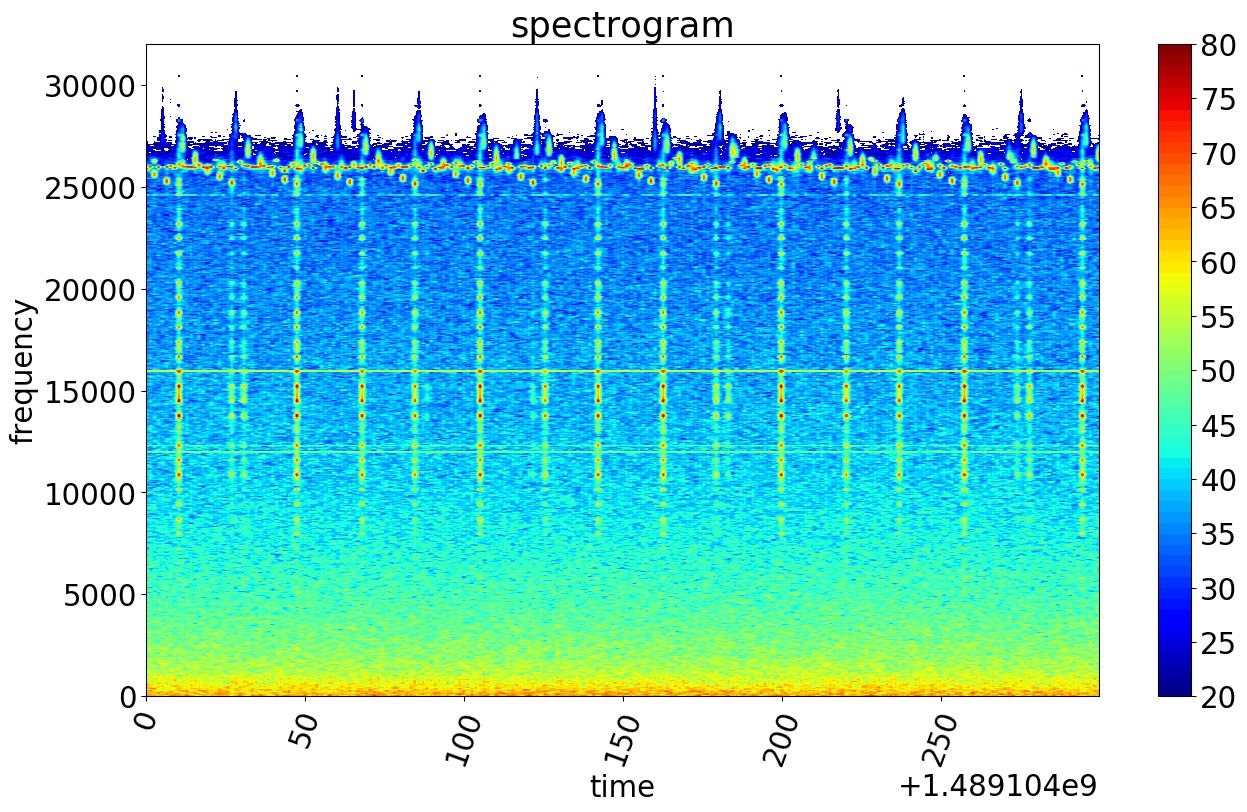

..\hydrophone\basic.py:637: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


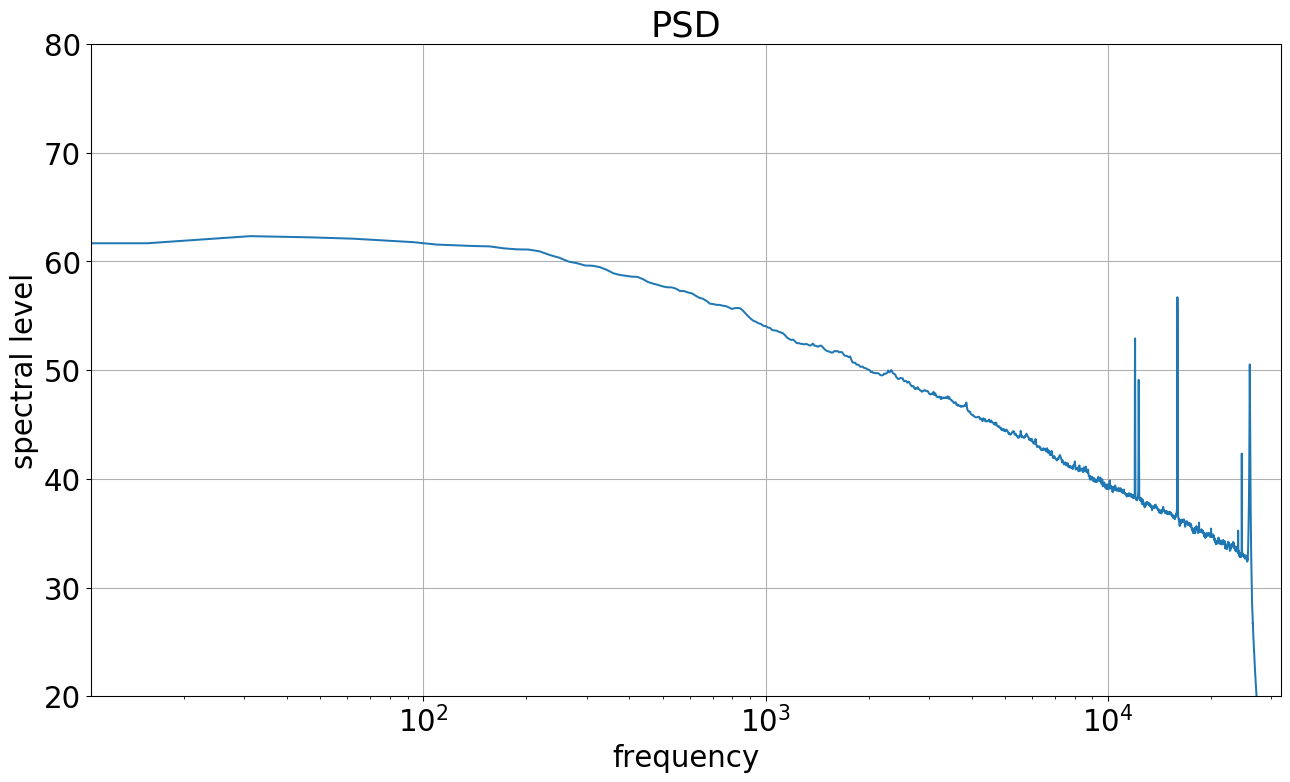

In [4]:
data1.compute_spectrogram()
data1.compute_psd_welch()
data1.spectrogram.visualize(res_reduction_time=20, fmax=32000)
data1.psd.visualize(fmax=32000)

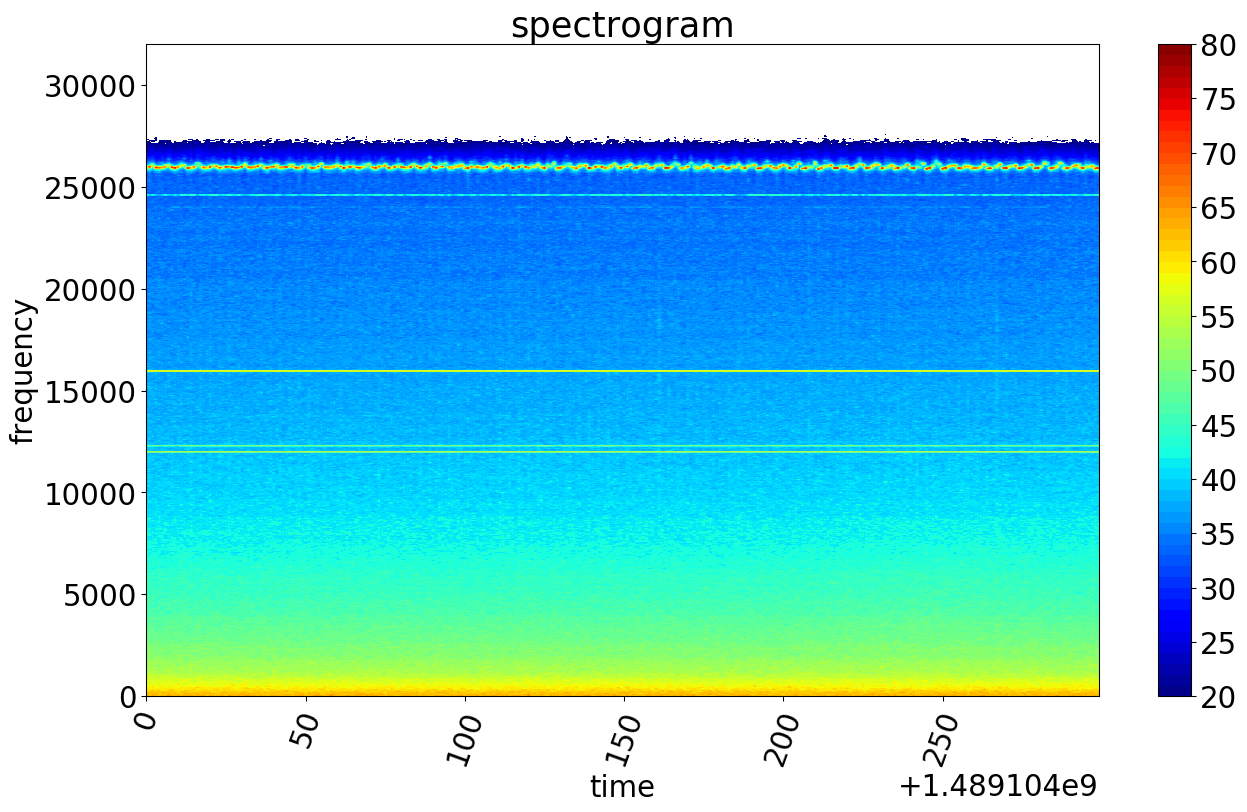

..\hydrophone\basic.py:636: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


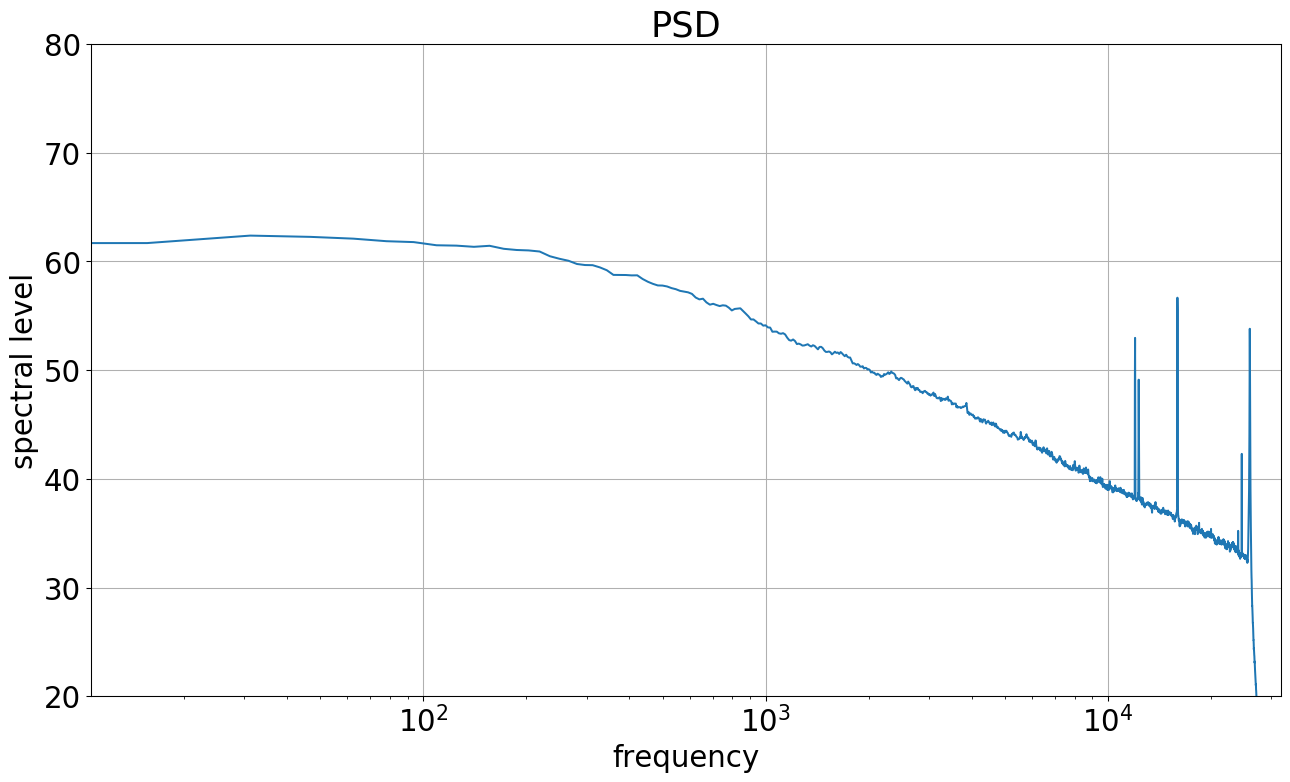

..\hydrophone\basic.py:636: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


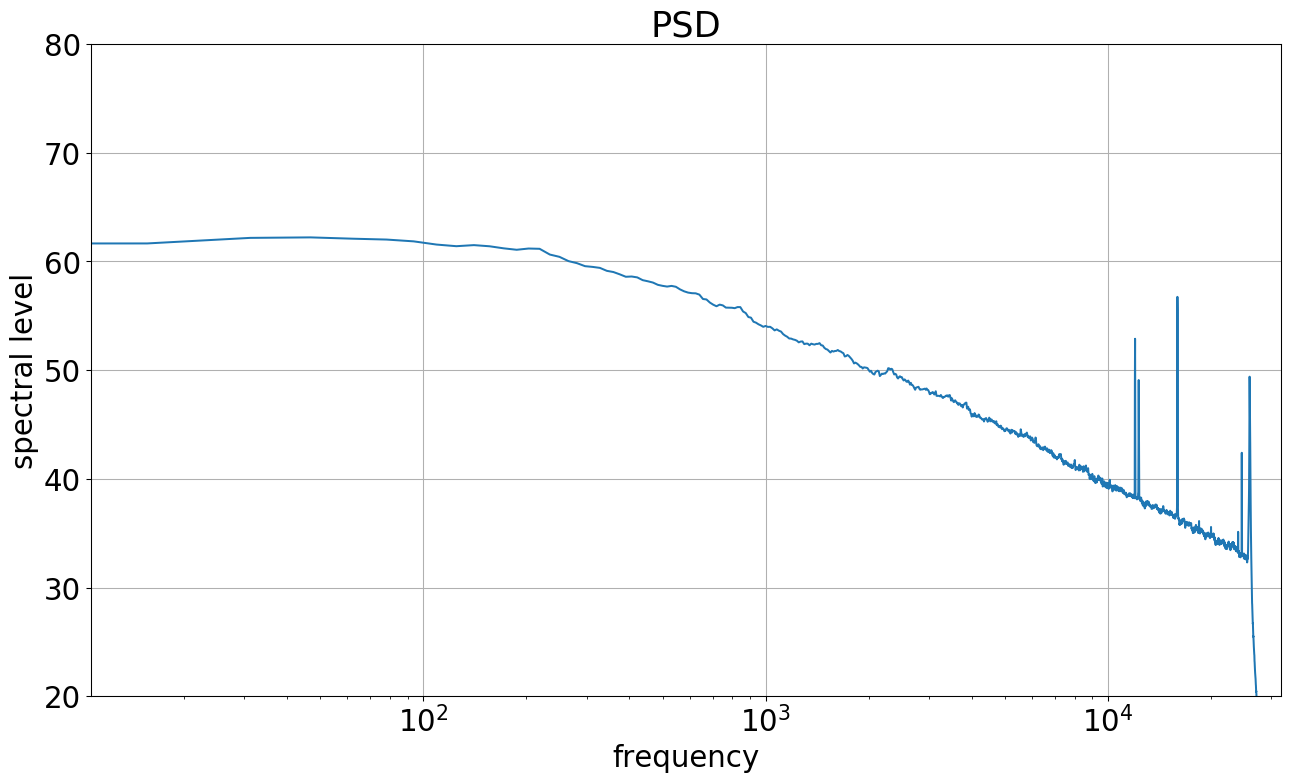

In [7]:
data1.compute_spectrogram_mp(n_process=3, avg_time=1.0)
data1.compute_psd_welch_mp(split=150, n_process=3)
data1.spectrogram.visualize(fmax=32000)

for psd in data1.psd_list:
    psd.visualize(fmax=32000)

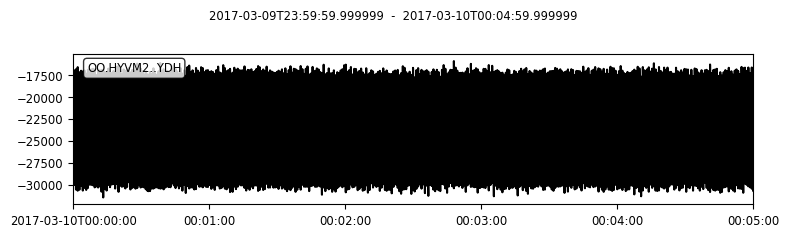

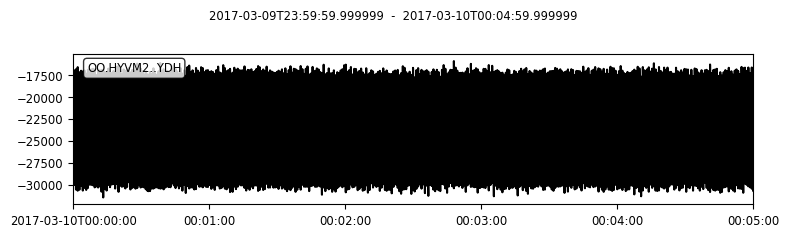

In [3]:
data2.plot()